In [1]:
import sys,os
import random
import numpy as np
import json
from collections import OrderedDict
from gnn import GNNNet
from utils import *
from emetrics import *
from data_process import create_dataset_for_5folds
import torch
import torch.nn as nn
from torch_geometric.data import DataLoader
import rdkit as rd
from torch_sparse import SparseTensor,transpose
import deepchem
import tensorflow as tf
import pandas as pd
import pickle

### Training

In [2]:
datasets = [['davis', 'kiba'][1]]
datasets 

['kiba']

In [3]:
method=['pconsc4', 'esm_cmaps', 'alpha_fold_cmaps'][0]
method

'pconsc4'

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.device('cuda:0')
cuda_name = ['cuda:0', 'cuda:1', 'cuda:2', 'cuda:3'][0]
print('cuda_name:', cuda_name)

cuda_name: cuda:0


In [5]:
fold = [0, 1, 2, 3, 4][1]
cross_validation_flag = True
# print(int(sys.argv[3]))

TRAIN_BATCH_SIZE = 128
TEST_BATCH_SIZE = 128
LR = 0.001
NUM_EPOCHS = 500

print('Learning rate: ', LR)
print('Epochs: ', NUM_EPOCHS)

Learning rate:  0.001
Epochs:  500


In [6]:
models_dir = 'models_sample'
results_dir = 'results'

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(results_dir):
    os.makedirs(results_dir)

# Main program: iterate over different datasets
result_str = ''
USE_CUDA = torch.cuda.is_available()
device = torch.device(cuda_name)
model = GNNNet()
model.to(device)
model_st = GNNNet.__name__
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

GNNNet Loaded


In [ ]:
for dataset in datasets:
    train_data, valid_data = create_dataset_for_5folds(dataset, fold, method)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=TRAIN_BATCH_SIZE, shuffle=True,
                                               collate_fn=collate)
    valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=TEST_BATCH_SIZE, shuffle=False,
                                               collate_fn=collate)

    best_mse = 1000
    best_test_mse = 1000
    best_epoch = -1
    model_file_name = 'models_sample/model_kiba_pconsc4__188_10_' + model_st + '_' + dataset + '_' + str(fold) + '.model'
    mse_list1=[]
    for epoch in range(NUM_EPOCHS):
        train(model, device, train_loader, optimizer, epoch + 1)
        print('predicting for valid data')
        G, P = predicting(model, device, valid_loader)
        val = get_mse(G, P)
        mse_list1.append(val)
        print('valid result:', val, best_mse)
        if val < best_mse:
            best_mse = val
            best_epoch = epoch + 1
            torch.save(model.state_dict(), model_file_name)
            print('rmse improved at epoch ', best_epoch, '; best_test_mse', best_mse, model_st, dataset, fold)
        else:
            print('No improvement since epoch ', best_epoch, '; best_test_mse', best_mse, model_st, dataset, fold)


dataset: kiba
fold: 1
train entries: 63716 effective train entries 63595
valid entries: 15929 effective valid entries 15903
effective drugs,effective prot: 2068 187


/disk/scratch/DGraphDTA/utils.py:52: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  GCNData_mol = DATA.Data(x=torch.Tensor(features),


Training on 63595 samples...
Train epoch: 1 [0/63595 (0%)]	Loss: 12.021812
Train epoch: 1 [5120/63595 (2%)]	Loss: 1.168583
Train epoch: 1 [10240/63595 (4%)]	Loss: 1.100888
Train epoch: 1 [15360/63595 (6%)]	Loss: 0.641371
Train epoch: 1 [20480/63595 (8%)]	Loss: 0.568158
Train epoch: 1 [25600/63595 (10%)]	Loss: 0.786693
Train epoch: 1 [30720/63595 (12%)]	Loss: 0.757757
Train epoch: 1 [35840/63595 (14%)]	Loss: 0.707955
Train epoch: 1 [40960/63595 (16%)]	Loss: 0.769729
Train epoch: 1 [46080/63595 (18%)]	Loss: 0.606048
Train epoch: 1 [51200/63595 (20%)]	Loss: 0.451431
Train epoch: 1 [56320/63595 (22%)]	Loss: 0.599523
Train epoch: 1 [61440/63595 (24%)]	Loss: 0.616227
Train epoch: 1 [66560/63595 (26%)]	Loss: 1.649219
Train epoch: 1 [71680/63595 (28%)]	Loss: 0.719005
Train epoch: 1 [76800/63595 (30%)]	Loss: 0.545716
Train epoch: 1 [81920/63595 (32%)]	Loss: 0.704494
Train epoch: 1 [87040/63595 (34%)]	Loss: 0.599646
Train epoch: 1 [92160/63595 (36%)]	Loss: 0.889213
Train epoch: 1 [97280/63595 (3

Train epoch: 4 [5120/63595 (2%)]	Loss: 0.806044
Train epoch: 4 [10240/63595 (4%)]	Loss: 0.529331
Train epoch: 4 [15360/63595 (6%)]	Loss: 0.527053
Train epoch: 4 [20480/63595 (8%)]	Loss: 0.725052
Train epoch: 4 [25600/63595 (10%)]	Loss: 0.510867
Train epoch: 4 [30720/63595 (12%)]	Loss: 0.524563
Train epoch: 4 [35840/63595 (14%)]	Loss: 1.633694
Train epoch: 4 [40960/63595 (16%)]	Loss: 0.759925
Train epoch: 4 [46080/63595 (18%)]	Loss: 0.516505
Train epoch: 4 [51200/63595 (20%)]	Loss: 0.564954
Train epoch: 4 [56320/63595 (22%)]	Loss: 0.524721
Train epoch: 4 [61440/63595 (24%)]	Loss: 0.855019
Train epoch: 4 [66560/63595 (26%)]	Loss: 0.531842
Train epoch: 4 [71680/63595 (28%)]	Loss: 0.650496
Train epoch: 4 [76800/63595 (30%)]	Loss: 0.589322
Train epoch: 4 [81920/63595 (32%)]	Loss: 0.949097
Train epoch: 4 [87040/63595 (34%)]	Loss: 0.582907
Train epoch: 4 [92160/63595 (36%)]	Loss: 0.695512
Train epoch: 4 [97280/63595 (38%)]	Loss: 0.609774
Train epoch: 4 [102400/63595 (40%)]	Loss: 0.648401
Trai

Train epoch: 7 [15360/63595 (6%)]	Loss: 0.955621
Train epoch: 7 [20480/63595 (8%)]	Loss: 0.556990
Train epoch: 7 [25600/63595 (10%)]	Loss: 0.609738
Train epoch: 7 [30720/63595 (12%)]	Loss: 0.839053
Train epoch: 7 [35840/63595 (14%)]	Loss: 0.455898
Train epoch: 7 [40960/63595 (16%)]	Loss: 0.760413
Train epoch: 7 [46080/63595 (18%)]	Loss: 0.787311
Train epoch: 7 [51200/63595 (20%)]	Loss: 0.494716
Train epoch: 7 [56320/63595 (22%)]	Loss: 0.474268
Train epoch: 7 [61440/63595 (24%)]	Loss: 0.750208
Train epoch: 7 [66560/63595 (26%)]	Loss: 0.726711
Train epoch: 7 [71680/63595 (28%)]	Loss: 0.693825
Train epoch: 7 [76800/63595 (30%)]	Loss: 0.592697
Train epoch: 7 [81920/63595 (32%)]	Loss: 0.684788
Train epoch: 7 [87040/63595 (34%)]	Loss: 0.538634
Train epoch: 7 [92160/63595 (36%)]	Loss: 0.559190
Train epoch: 7 [97280/63595 (38%)]	Loss: 0.533748
Train epoch: 7 [102400/63595 (40%)]	Loss: 0.612834
Train epoch: 7 [107520/63595 (42%)]	Loss: 0.735102
Train epoch: 7 [112640/63595 (44%)]	Loss: 0.853509

Train epoch: 10 [20480/63595 (8%)]	Loss: 0.589643
Train epoch: 10 [25600/63595 (10%)]	Loss: 0.548040
Train epoch: 10 [30720/63595 (12%)]	Loss: 0.425074
Train epoch: 10 [35840/63595 (14%)]	Loss: 0.634268
Train epoch: 10 [40960/63595 (16%)]	Loss: 0.408434
Train epoch: 10 [46080/63595 (18%)]	Loss: 0.663472
Train epoch: 10 [51200/63595 (20%)]	Loss: 0.570802
Train epoch: 10 [56320/63595 (22%)]	Loss: 0.543111
Train epoch: 10 [61440/63595 (24%)]	Loss: 0.507095
Train epoch: 10 [66560/63595 (26%)]	Loss: 0.518916
Train epoch: 10 [71680/63595 (28%)]	Loss: 0.500189
Train epoch: 10 [76800/63595 (30%)]	Loss: 0.579434
Train epoch: 10 [81920/63595 (32%)]	Loss: 0.629555
Train epoch: 10 [87040/63595 (34%)]	Loss: 0.746879
Train epoch: 10 [92160/63595 (36%)]	Loss: 0.611793
Train epoch: 10 [97280/63595 (38%)]	Loss: 0.501310
Train epoch: 10 [102400/63595 (40%)]	Loss: 0.692759
Train epoch: 10 [107520/63595 (42%)]	Loss: 0.602648
Train epoch: 10 [112640/63595 (44%)]	Loss: 0.656818
Train epoch: 10 [117760/63595

Train epoch: 13 [10240/63595 (4%)]	Loss: 0.659760
Train epoch: 13 [15360/63595 (6%)]	Loss: 0.677245
Train epoch: 13 [20480/63595 (8%)]	Loss: 0.439080
Train epoch: 13 [25600/63595 (10%)]	Loss: 0.889660
Train epoch: 13 [30720/63595 (12%)]	Loss: 0.465371
Train epoch: 13 [35840/63595 (14%)]	Loss: 0.694809
Train epoch: 13 [40960/63595 (16%)]	Loss: 0.781666
Train epoch: 13 [46080/63595 (18%)]	Loss: 0.546621
Train epoch: 13 [51200/63595 (20%)]	Loss: 0.643078
Train epoch: 13 [56320/63595 (22%)]	Loss: 0.766094
Train epoch: 13 [61440/63595 (24%)]	Loss: 0.698907
Train epoch: 13 [66560/63595 (26%)]	Loss: 0.752220
Train epoch: 13 [71680/63595 (28%)]	Loss: 0.648296
Train epoch: 13 [76800/63595 (30%)]	Loss: 0.569712
Train epoch: 13 [81920/63595 (32%)]	Loss: 0.403383
Train epoch: 13 [87040/63595 (34%)]	Loss: 0.365508
Train epoch: 13 [92160/63595 (36%)]	Loss: 0.558425
Train epoch: 13 [97280/63595 (38%)]	Loss: 0.407492
Train epoch: 13 [102400/63595 (40%)]	Loss: 0.605456
Train epoch: 13 [107520/63595 (42

In [13]:
len(mse_list1)

500

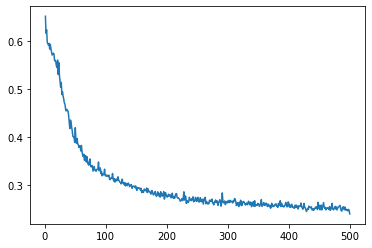

In [14]:
import matplotlib.pyplot as plt
ep=[i for i in range(1,501)]

plt.plot(ep,mse_list1)

In [15]:
with open('mse_pconsc4_188_500_file.txt', 'w') as f:
    for item in mse_list1:
        f.write("%s\n" % item)

In [17]:
print(model)

GNNNet(
  (mol_conv1): GCNConv(78, 78)
  (mol_conv2): GCNConv(78, 156)
  (mol_conv3): GCNConv(156, 312)
  (mol_fc_g1): Linear(in_features=312, out_features=1024, bias=True)
  (mol_fc_g2): Linear(in_features=1024, out_features=128, bias=True)
  (pro_conv1): GCNConv(54, 54)
  (pro_conv2): GCNConv(54, 108)
  (pro_conv3): GCNConv(108, 216)
  (pro_fc_g1): Linear(in_features=216, out_features=1024, bias=True)
  (pro_fc_g2): Linear(in_features=1024, out_features=128, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=256, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (out): Linear(in_features=512, out_features=1, bias=True)
)


In [28]:
t = torch.cuda.get_device_properties(0).total_memory
r = torch.cuda.memory_reserved(0)
a = torch.cuda.memory_allocated(0)
f = r-a  # free inside reserved
f

25794048

In [7]:
torch.cuda.empty_cache()

In [27]:
print(t,r,a,f)

6222839808 3321888768 35023360 3286865408


In [29]:
print(t,r,a,f)

6222839808 60817408 35023360 25794048


In [30]:
torch.cuda.mem_get_info()

(4509466624, 6222839808)

In [33]:
torch.cuda.memory_stats()

OrderedDict([('active.all.allocated', 150749902),
             ('active.all.current', 130),
             ('active.all.freed', 150749772),
             ('active.all.peak', 160),
             ('active.large_pool.allocated', 38701126),
             ('active.large_pool.current', 10),
             ('active.large_pool.freed', 38701116),
             ('active.large_pool.peak', 26),
             ('active.small_pool.allocated', 112048776),
             ('active.small_pool.current', 120),
             ('active.small_pool.freed', 112048656),
             ('active.small_pool.peak', 144),
             ('active_bytes.all.allocated', 1816698561822720),
             ('active_bytes.all.current', 35023360),
             ('active_bytes.all.freed', 1816698526799360),
             ('active_bytes.all.peak', 1744957440),
             ('active_bytes.large_pool.allocated', 1800748219243520),
             ('active_bytes.large_pool.current', 18009600),
             ('active_bytes.large_pool.freed', 1800748201233

In [34]:
torch.cuda.memory_summary()

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 2         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   34202 KB |    1664 MB |    1652 TB |    1652 TB |\n|       from large pool |   17587 KB |    1646 MB |    1637 TB |    1637 TB |\n|       from small pool |   16615 KB |      22 MB |      14 TB |      14 TB |\n|---------------------------------------------------------------------------|\n| Active memory         |   34202 KB |    1664 MB |    1652 TB |    1652 TB |\n|       from large pool |   17587 KB |    1646 MB |

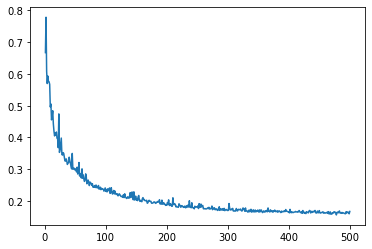

In [15]:
import matplotlib.pyplot as plt
ep=[i for i in range(1,501)]

plt.plot(ep,mse_list1)

In [16]:
with open('mse_pconsc4_500_file.txt', 'w') as f:
    for item in mse_list1:
        f.write("%s\n" % item)

In [7]:
import os
import sys
import torch
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt
from torch_geometric.data import Batch

from emetrics import get_aupr, get_cindex, get_rm2, get_ci, get_mse, get_rmse, get_pearson, get_spearman
from utils import *
from scipy import stats
from gnn import GNNNet
from data_process import create_dataset_for_test


def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data_mol = data[0].to(device)
            data_pro = data[1].to(device)
            # data = data.to(device)
            output = model(data_mol, data_pro)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data_mol.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(), total_preds.numpy().flatten()


def load_model(model_path):
    model = torch.load(model_path)
    return model


def calculate_metrics(Y, P, dataset='davis'):
    # aupr = get_aupr(Y, P)
    cindex = get_cindex(Y, P)  # DeepDTA
    cindex2 = get_ci(Y, P)  # GraphDTA
    rm2 = get_rm2(Y, P)  # DeepDTA
    mse = get_mse(Y, P)
    pearson = get_pearson(Y, P)
    spearman = get_spearman(Y, P)
    rmse = get_rmse(Y, P)

    print('metrics for ', dataset)
    # print('aupr:', aupr)
    print('cindex:', cindex)
    print('cindex2', cindex2)
    print('rm2:', rm2)
    print('mse:', mse)
    print('pearson', pearson)

    result_file_name = 'results/result_pconsc4_188_500_' + model_st + '_' + dataset + '.txt'
    result_str = ''
    result_str += dataset + '\r\n'
    result_str += 'rmse:' + str(rmse) + ' ' + ' mse:' + str(mse) + ' ' + ' pearson:' + str(
        pearson) + ' ' + 'spearman:' + str(spearman) + ' ' + 'ci:' + str(cindex) + ' ' + 'rm2:' + str(rm2)
    print(result_str)
    open(result_file_name, 'w').writelines(result_str)


def plot_density(Y, P, fold=0, dataset='davis'):
    plt.figure(figsize=(10, 5))
    plt.grid(linestyle='--')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.scatter(P, Y, color='blue', s=40)
    plt.title('density of ' + dataset, fontsize=30, fontweight='bold')
    plt.xlabel('predicted', fontsize=30, fontweight='bold')
    plt.ylabel('measured', fontsize=30, fontweight='bold')
    # plt.xlim(0, 21)
    # plt.ylim(0, 21)
    if dataset == 'davis':
        plt.plot([5, 11], [5, 11], color='black')
    else:
        plt.plot([6, 16], [6, 16], color='black')
    # plt.legend()
    plt.legend(loc=0, numpoints=1)
    leg = plt.gca().get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=12, fontweight='bold')
    plt.savefig(os.path.join('results', dataset + '_pconsc4_188_500_' + str(fold) + '.png'), dpi=500, bbox_inches='tight')




In [8]:

dataset = ['davis', 'kiba'][1]  # dataset selection
model_st = GNNNet.__name__
print('dataset:', dataset)
cuda_name = ['cuda:0', 'cuda:1', 'cuda:2', 'cuda:3'][0] # gpu selection
print('cuda_name:', cuda_name)

 

dataset: kiba
cuda_name: cuda:0


In [9]:
TEST_BATCH_SIZE = 128
models_dir = 'models'
results_dir = 'results'

device = torch.device(cuda_name if torch.cuda.is_available() else 'cpu')
#model_file_name = 'models_sample/model1111_' + model_st + '_' + dataset + '.model'
model_file_name = 'models_sample/model_kiba_pconsc4__188_500_GNNNet_kiba_1.model'
result_file_name = 'results/resul_pconsc4_188_500_' + model_st + '_' + dataset + '.txt'

model = GNNNet()
model.to(device)
model.load_state_dict(torch.load(model_file_name, map_location=cuda_name))
test_data = create_dataset_for_test(dataset,method)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=TEST_BATCH_SIZE, shuffle=False,
                                              collate_fn=collate)

Y, P = predicting(model, device, test_loader)
calculate_metrics(Y, P, dataset)
    


GNNNet Loaded
dataset: kiba
test entries: 15932 effective test entries 15908
effective drugs,effective prot: 2068 187


/disk/scratch/DGraphDTA/utils.py:52: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  GCNData_mol = DATA.Data(x=torch.Tensor(features),


Make prediction for 15908 samples...
metrics for  kiba
cindex: 0.8415813040648729
cindex2 0.8402006269987397
rm2: 0.6372241527747593
mse: 0.23531172
pearson 0.8090038027833875
kiba
rmse:0.4850893905198996  mse:0.23531172  pearson:0.8090038027833875 spearman:0.804624847386754 ci:0.8415813040648729 rm2:0.6372241527747593


No handles with labels found to put in legend.


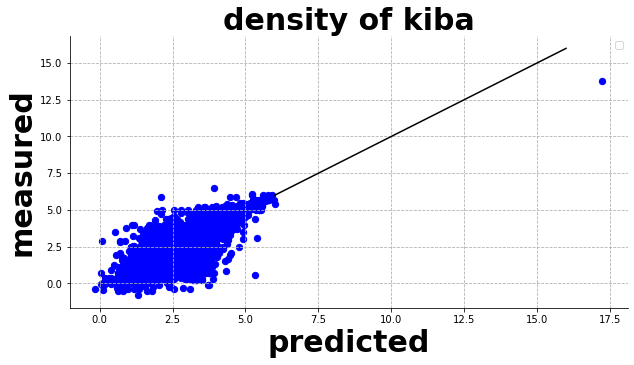

In [10]:
plot_density(Y, P, fold, dataset)

In [18]:
test_loader

In [10]:
Y

array([14.400163, 12.399998, 11.400001, ..., 11.400001, 11.5     ,
       11.5     ], dtype=float32)

In [11]:
P

array([13.495261, 12.662182, 11.396714, ..., 11.395967, 11.504625,
       11.45087 ], dtype=float32)

In [48]:

my_file = open("alpha500_pred_file.txt", "r")
content = my_file.read()
content=content.splitlines()
content=[float(i) for i in content]
print(content)

[13.572652, 12.826997, 11.444092, 10.318037, 11.341069, 11.559343, 11.85205, 11.203673, 10.334731, 11.582762, 13.900543, 12.97712, 11.691866, 12.792691, 14.458044, 11.520013, 12.257853, 11.212511, 12.006573, 11.880769, 11.1070795, 11.378011, 11.148856, 11.216189, 11.134102, 12.008484, 10.905703, 11.242366, 11.19693, 10.343345, 11.86922, 12.26573, 10.585809, 12.672529, 11.919928, 10.658084, 11.237454, 11.279299, 11.310264, 11.870662, 11.057477, 11.480621, 12.106813, 11.613607, 10.156403, 11.307625, 10.7861595, 11.92269, 11.224873, 12.009879, 10.479592, 11.211487, 11.759775, 11.364248, 11.742957, 12.0676775, 12.2011385, 11.140188, 11.8148365, 11.463266, 11.225105, 11.48033, 12.019633, 11.547219, 11.362604, 12.447442, 10.850902, 11.337198, 10.871161, 11.64067, 11.490308, 11.450138, 11.544379, 10.872649, 12.062119, 11.466935, 11.917785, 11.780647, 11.215674, 12.046588, 11.4404955, 10.219847, 11.889244, 11.15485, 11.559784, 12.427896, 12.339859, 10.860705, 12.2455225, 11.580148, 11.404127, 

In [49]:
P1=np.asarray(content)

In [50]:
P1

array([13.572652 , 12.826997 , 11.444092 , ..., 11.422882 , 11.5344305,
       11.544348 ])

In [52]:
plt.scatter(P,color='blue')

TypeError: scatter() missing 1 required positional argument: 'y'

In [37]:
type(content)

str

In [41]:
P

array([13.495261, 12.662182, 11.396714, ..., 11.395967, 11.504625,
       11.45087 ], dtype=float32)

No handles with labels found to put in legend.


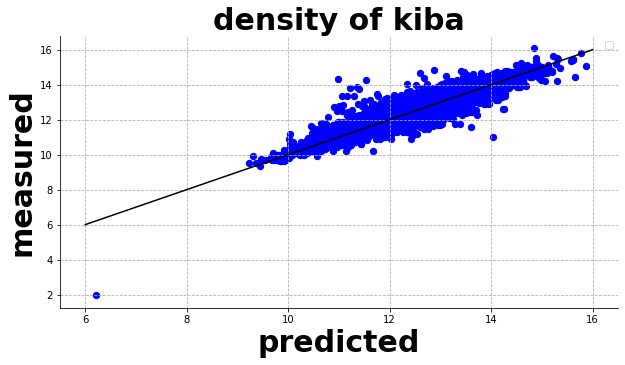

In [53]:
plot_density(P1, P, fold, dataset)

In [12]:
with open('pconsc4_500_gt_file.txt', 'w') as f:
    for item in list(Y):
        f.write("%s\n" % item)

In [13]:
with open('pconsc4_500_pred_file.txt', 'w') as f:
    for item in list(P):
        f.write("%s\n" % item)

No handles with labels found to put in legend.


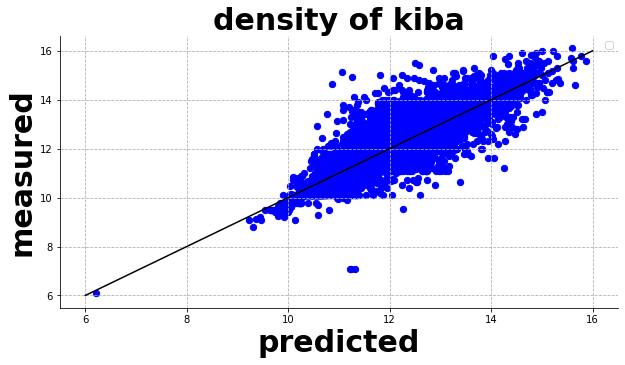

In [54]:
plot_density(Y, P, fold, dataset)

In [58]:
def plot_density1(Y, P,P1, fold=0, dataset='davis'):
    plt.figure(figsize=(10, 5))
    plt.grid(linestyle='--')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.scatter(P, Y, color='blue', s=40)
    plt.scatter(P1, Y, color='green', s=40)
    plt.title('density of ' + dataset, fontsize=30, fontweight='bold')
    plt.xlabel('predicted', fontsize=30, fontweight='bold')
    plt.ylabel('measured', fontsize=30, fontweight='bold')
    # plt.xlim(0, 21)
    # plt.ylim(0, 21)
    if dataset == 'davis':
        plt.plot([5, 11], [5, 11], color='black')
    else:
        plt.plot([6, 16], [6, 16], color='black')
    # plt.legend()
    plt.legend(loc=0, numpoints=1)
    leg = plt.gca().get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=12, fontweight='bold')
    #plt.savefig(os.path.join('results', dataset + 'alpha v/s pconsc4_500_' + str(fold) + '.png'), dpi=500, bbox_inches='tight')


No handles with labels found to put in legend.


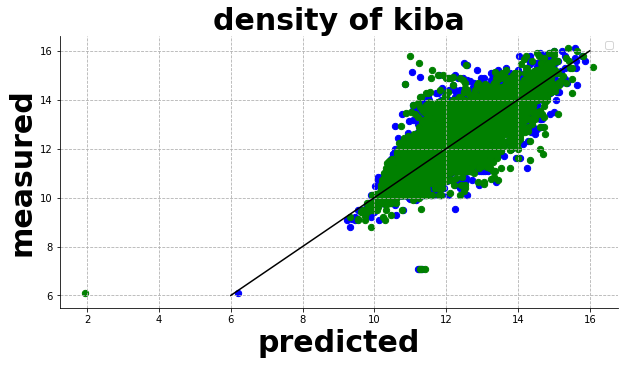

In [59]:
plot_density1(Y, P,P1, fold, dataset)

No handles with labels found to put in legend.


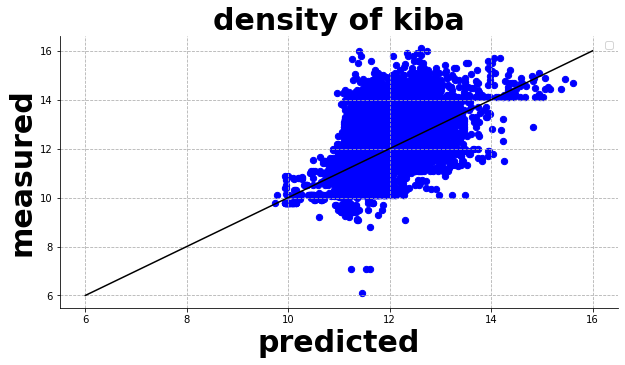

In [13]:
plot_density(Y, P, fold, dataset)

In [ ]:
plot_density(Y, P, fold, dataset)

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='2, 3'